In [66]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable


In [67]:
# подгружаем нужные билиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

## Шаг 1. Загрузка, очистка данных, первичный анализ, заполнение пропусков 

In [68]:
crime_data = pd.read_csv('Crimes_2023_20240903.csv', dtype={'IUCR': str})

In [72]:
# Проверка общей информации о данных
crime_data_info = crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261890 entries, 0 to 262436
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    261890 non-null  int64  
 1   Case Number           261890 non-null  object 
 2   Date                  261890 non-null  object 
 3   Block                 261890 non-null  object 
 4   IUCR                  261890 non-null  object 
 5   Primary Type          261890 non-null  object 
 6   Description           261890 non-null  object 
 7   Location Description  261890 non-null  object 
 8   Arrest                261890 non-null  bool   
 9   Domestic              261890 non-null  bool   
 10  Beat                  261890 non-null  int64  
 11  District              261890 non-null  int64  
 12  Ward                  261890 non-null  float64
 13  Community Area        261890 non-null  int64  
 14  FBI Code              261890 non-null  object 
 15  

In [73]:
# Проверка на наличие пропусков
missing_values = crime_data.isnull().sum()
missing_values

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [71]:
# Заполнение пропусков в Location Description
crime_data['Location Description'].fillna('Unknown', inplace=True)

# Заполнение пропусков в Ward медианным значением
median_ward = crime_data['Ward'].median()
crime_data['Ward'].fillna(median_ward, inplace=True)

# Удаление строк с пропусками в координатах
crime_data.dropna(subset=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'], inplace=True)

# Проверка на оставшиеся пропуски
missing_values_after = crime_data.isnull().sum()

missing_values_after


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [76]:
crime_data.()

ID           Beat       District           Ward  \
count  2.618900e+05  261890.000000  261890.000000  261890.000000   
mean   1.310579e+07    1156.008000      11.330650      23.135637   
std    6.501305e+05     712.345978       7.119442      14.011453   
min    2.727900e+04     111.000000       1.000000       1.000000   
25%    1.303917e+07     533.000000       5.000000      10.000000   
50%    1.313721e+07    1032.000000      10.000000      23.000000   
75%    1.323347e+07    1732.000000      17.000000      34.000000   
max    1.358195e+07    2535.000000      31.000000      50.000000   

       Community Area  X Coordinate  Y Coordinate      Year       Latitude  \
count   261890.000000  2.618900e+05  2.618900e+05  261890.0  261890.000000   
mean        36.275658  1.165325e+06  1.887370e+06    2023.0      41.846525   
std         21.580558  1.635536e+04  3.174611e+04       0.0       0.087301   
min          1.000000  1.091242e+06  1.813897e+06    2023.0      41.644590   
25%         22.000000  1.153937e+06  1.859892e+06    2023.0      41.770863   
50%         32.000000  1.167095e+06  1.893544e+06    2023.0      41.863576   
75%         53.000000  1.176796e+06  1.910423e+06    2023.0      41.910007   
max         77.000000  1.205119e+06  1.951506e+06    2023.0      42.022549   

           Longitude  
count  261890.000000  
mean      -87.668795  
std         0.059546  
min       -87.939733  
25%       -87.710260  
50%       -87.662229  
75%       -87.626825  
max       -87.524532

In [75]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261890 entries, 0 to 262436
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    261890 non-null  int64  
 1   Case Number           261890 non-null  object 
 2   Date                  261890 non-null  object 
 3   Block                 261890 non-null  object 
 4   IUCR                  261890 non-null  object 
 5   Primary Type          261890 non-null  object 
 6   Description           261890 non-null  object 
 7   Location Description  261890 non-null  object 
 8   Arrest                261890 non-null  bool   
 9   Domestic              261890 non-null  bool   
 10  Beat                  261890 non-null  int64  
 11  District              261890 non-null  int64  
 12  Ward                  261890 non-null  float64
 13  Community Area        261890 non-null  int64  
 14  FBI Code              261890 non-null  object 
 15  

### Анализ временных тенденций преступности
Описание:
На этом этапе мы исследуем, как преступность распределяется по времени в течение 2023 года. Мы будем анализировать распределение преступлений по месяцам, дням недели и времени суток. Это поможет нам выявить временные паттерны, такие как пики преступности в определенные периоды.


* Анализируем сезонные колебания преступности по месяцам.

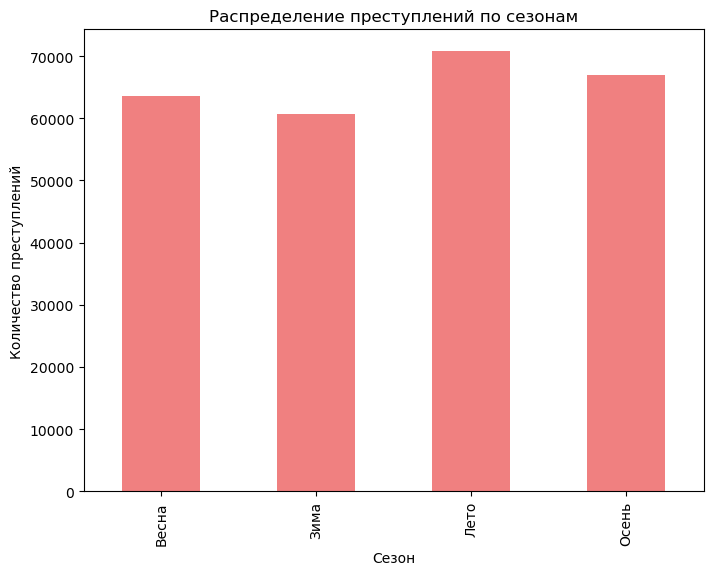

In [84]:

crime_data['Date'] = pd.to_datetime(crime_data['Date'])

# Извлекаем месяц из столбца 'Date'
crime_data['Month'] = crime_data['Date'].dt.month

# Теперь можно добавить сезон
crime_data['Season'] = crime_data['Month'].map(seasons)

# Группировка данных по сезонам
crimes_by_season = crime_data.groupby('Season')['ID'].count()

# Визуализация
plt.figure(figsize=(8, 6))
crimes_by_season.plot(kind='bar', color='lightcoral')
plt.title('Распределение преступлений по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество преступлений')
plt.show()



### Анализируем распределение преступлений по дням недели

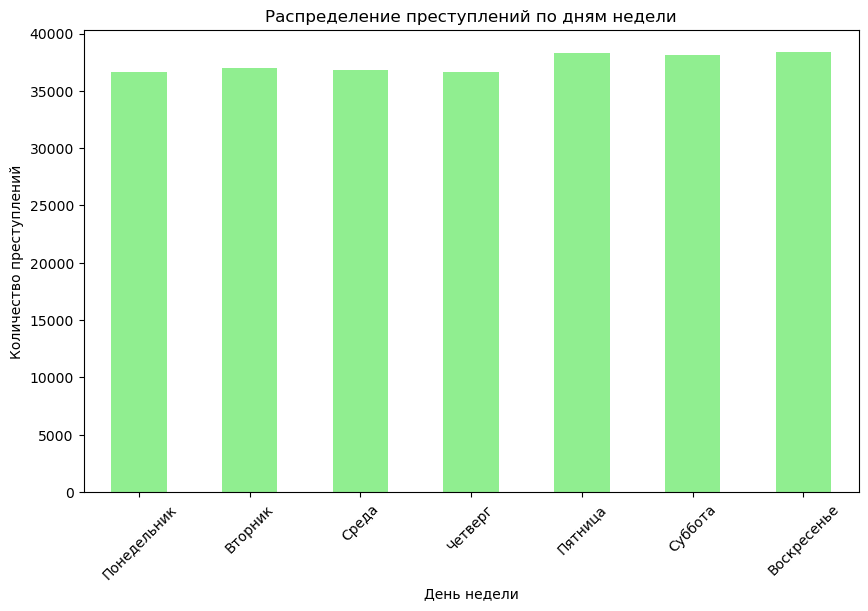

In [14]:
# Выделяем день недели
crime_data['DayOfWeek'] = crime_data['Date'].dt.day_name(locale='Russian')

# Группировка по дням недели
crimes_by_day = crime_data['DayOfWeek'].value_counts()

# Визуализация
plt.figure(figsize=(10, 6))
crimes_by_day.loc[['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']].plot(kind='bar', color='lightgreen')
plt.title('Распределение преступлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество преступлений')
plt.xticks(rotation=45)
plt.show()



### Анализируем, в какое время суток совершаются преступления


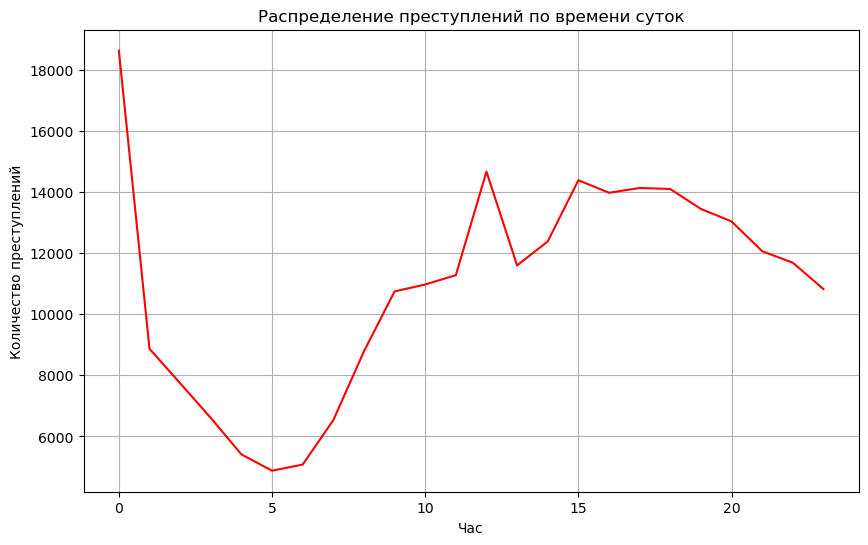

In [85]:
# Извлечение часа из даты
crime_data['Hour'] = crime_data['Date'].dt.hour

# Распределение преступлений по часам
hour_distribution = crime_data['Hour'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(10, 6))
hour_distribution.plot(kind='line', color='red')
plt.title('Распределение преступлений по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество преступлений')
plt.grid(True)
plt.show()


###  Анализ географического распределения преступлений
Заменяем цифровые обозначения районов на их названия, используя ваш словарь

In [16]:
# словарь с названиями районов
area_names = {
    1: 'ROGERS PARK', 2: 'WEST RIDGE', 3: 'UPTOWN', 4: 'LINCOLN SQUARE', 5: 'NORTH CENTER',
    6: 'LAKE VIEW', 7: 'LINCOLN PARK', 8: 'NEAR NORTH SIDE', 9: 'EDISON PARK', 10: 'NORWOOD PARK',
    11: 'JEFFERSON PARK', 12: 'FOREST GLEN', 13: 'NORTH PARK', 14: 'ALBANY PARK', 15: 'PORTAGE PARK',
    16: 'IRVING PARK', 17: 'DUNNING', 18: 'MONTCLARE', 19: 'BELMONT CRAGIN', 20: 'HERMOSA',
    21: 'AVONDALE', 22: 'LOGAN SQUARE', 23: 'HUMBOLDT PARK', 24: 'WEST TOWN', 25: 'AUSTIN',
    26: 'WEST GARFIELD PARK', 27: 'EAST GARFIELD PARK', 28: 'NEAR WEST SIDE', 29: 'NORTH LAWNDALE',
    30: 'SOUTH LAWNDALE', 31: 'LOWER WEST SIDE', 32: 'LOOP', 33: 'NEAR SOUTH SIDE', 34: 'ARMOUR SQUARE',
    36: 'OAKLAND', 37: 'FULLER PARK', 38: 'GRAND BOULEVARD', 39: 'KENWOOD', 40: 'WASHINGTON PARK',
    41: 'HYDE PARK', 42: 'WOODLAWN', 43: 'SOUTH SHORE', 44: 'CHATHAM', 45: 'AVALON PARK',
    46: 'SOUTH CHICAGO', 47: 'BURNSIDE', 48: 'CALUMET HEIGHTS', 49: 'ROSELAND', 50: 'PULLMAN',
    51: 'SOUTH DEERING', 52: 'EAST SIDE', 53: 'WEST PULLMAN', 54: 'RIVERDALE', 55: 'HEGEWISCH',
    56: 'GARFIELD RIDGE', 57: 'ARCHER HEIGHTS', 58: 'BRIGHTON PARK', 59: 'MCKINLEY PARK',
    60: 'BRIDGEPORT', 61: 'NEW CITY', 62: 'WEST ELSDON', 63: 'GAGE PARK', 64: 'CLEARING',
    65: 'WEST LAWN', 66: 'CHICAGO LAWN', 67: 'WEST ENGLEWOOD', 68: 'ENGLEWOOD', 69: 'GREATER GRAND CROSSING',
    70: 'ASHBURN', 71: 'AUBURN GRESHAM', 72: 'BEVERLY', 73: 'WASHINGTON HEIGHTS', 74: 'MOUNT GREENWOOD',
    75: 'MORGAN PARK', 76: 'OHARE', 77: 'EDGEWATER'
}

# Преобразуем 'Community Area' в названия районов
crime_data['Community Area Name'] = crime_data['Community Area'].map(area_names)


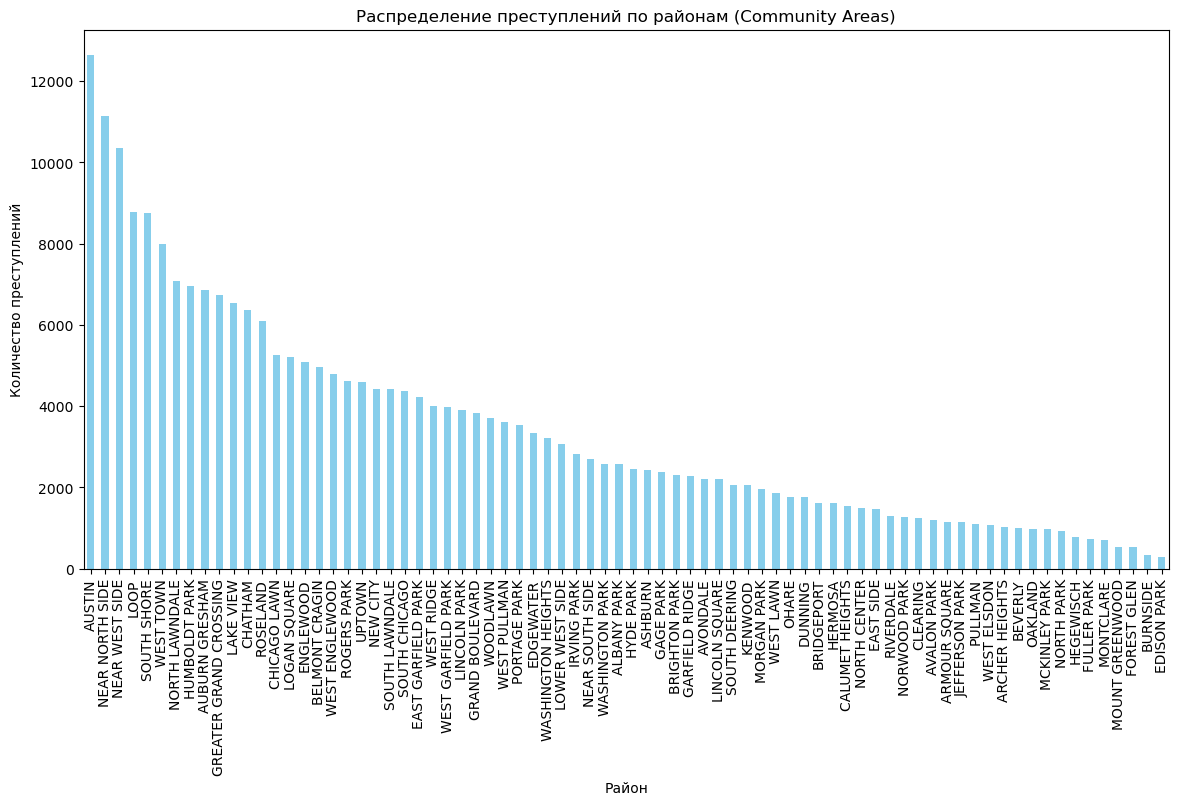

In [36]:
# Замена кодов районов на названия
crime_data['Community Area Name'] = crime_data['Community Area'].map(area_names)

# Распределение преступлений по районам (Community Area)
community_distribution = crime_data['Community Area Name'].value_counts().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(14, 7))
community_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение преступлений по районам (Community Areas)')
plt.xlabel('Район')
plt.ylabel('Количество преступлений')
plt.xticks(rotation=90)
plt.show()


### Создание тепловой карты преступности

In [55]:
import folium
from folium.plugins import HeatMap

# Фильтруем данные с ненулевыми координатами
crime_data_geo = crime_data.dropna(subset=['Latitude', 'Longitude'])

# Создаем базовую карту Чикаго
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Подготовка данных для тепловой карты
heat_data = [[row['Latitude'], row['Longitude']] for index, row in crime_data_geo.iterrows()]

# Добавление тепловой карты на базовую карту
HeatMap(heat_data).add_to(chicago_map)

# Отображение карты
chicago_map


###  Выбор районов с наибольшей и наименьшей преступной активностью

Районы с наибольшим количеством преступлений: [25, 8, 28, 32, 43]
Районы с наименьшим количеством преступлений: [18, 74, 12, 47, 9]


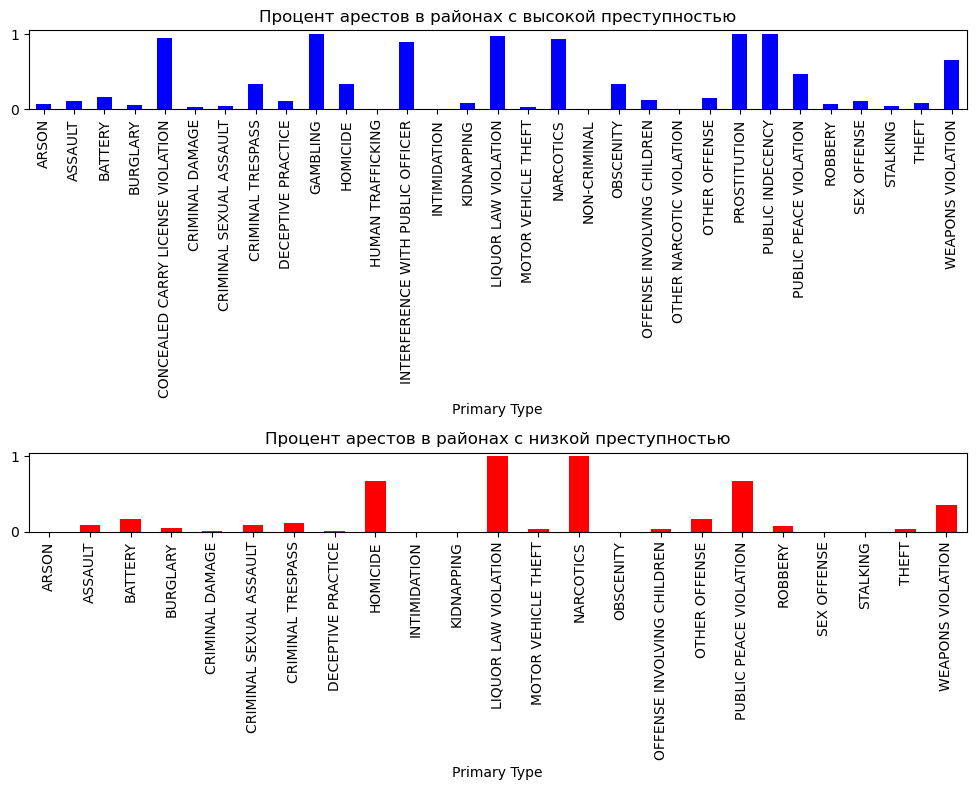

In [56]:
# Выбор районов с наибольшей и наименьшей преступной активностью
top_crime_areas = crime_data['Community Area'].value_counts().head(5)
low_crime_areas = crime_data['Community Area'].value_counts().tail(5)

print("Районы с наибольшим количеством преступлений:", top_crime_areas.index.tolist())
print("Районы с наименьшим количеством преступлений:", low_crime_areas.index.tolist())

# Анализ арестов в районах с высокой и низкой преступностью
high_crime_arrests = crime_data[crime_data['Community Area'].isin(top_crime_areas.index)].groupby('Primary Type')['Arrest'].mean()
low_crime_arrests = crime_data[crime_data['Community Area'].isin(low_crime_areas.index)].groupby('Primary Type')['Arrest'].mean()

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
high_crime_arrests.plot(kind='bar', ax=axes[0], color='blue', title='Процент арестов в районах с высокой преступностью')
low_crime_arrests.plot(kind='bar', ax=axes[1], color='red', title='Процент арестов в районах с низкой преступностью')
plt.tight_layout()
plt.show()


###  Анализ арестов и их связи с типами преступлений

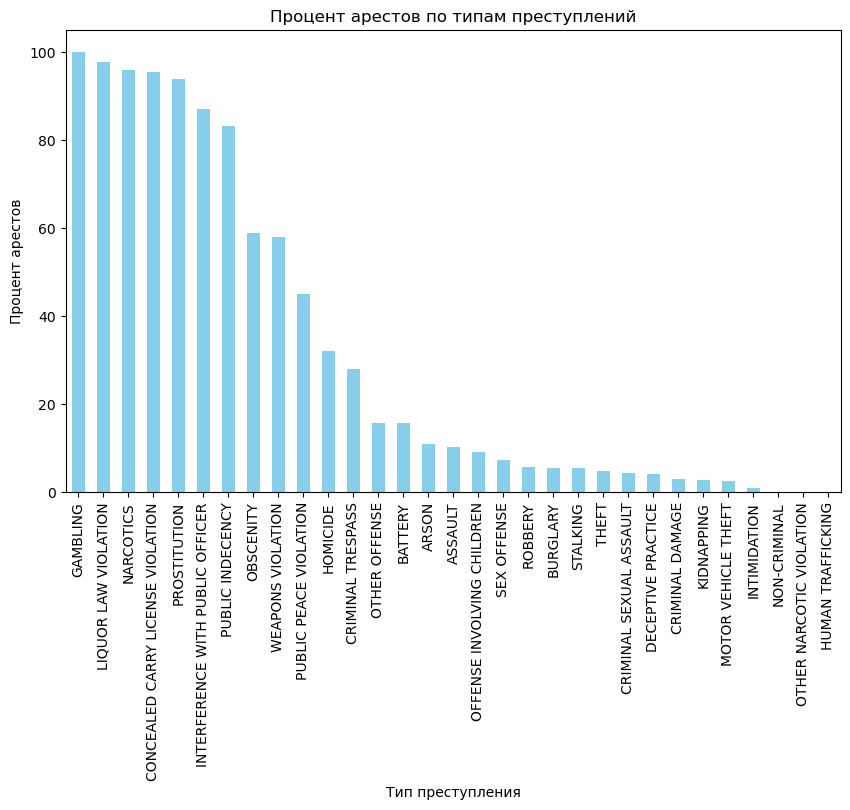

In [38]:
# Подсчет количества арестов по типам преступлений
arrest_by_type = crime_data.groupby('Primary Type')['Arrest'].mean() * 100

# Визуализация
plt.figure(figsize=(10, 6))
arrest_by_type.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Процент арестов по типам преступлений')
plt.xlabel('Тип преступления')
plt.ylabel('Процент арестов')
plt.xticks(rotation=90)
plt.show()


###  Средний процент арестов по районам

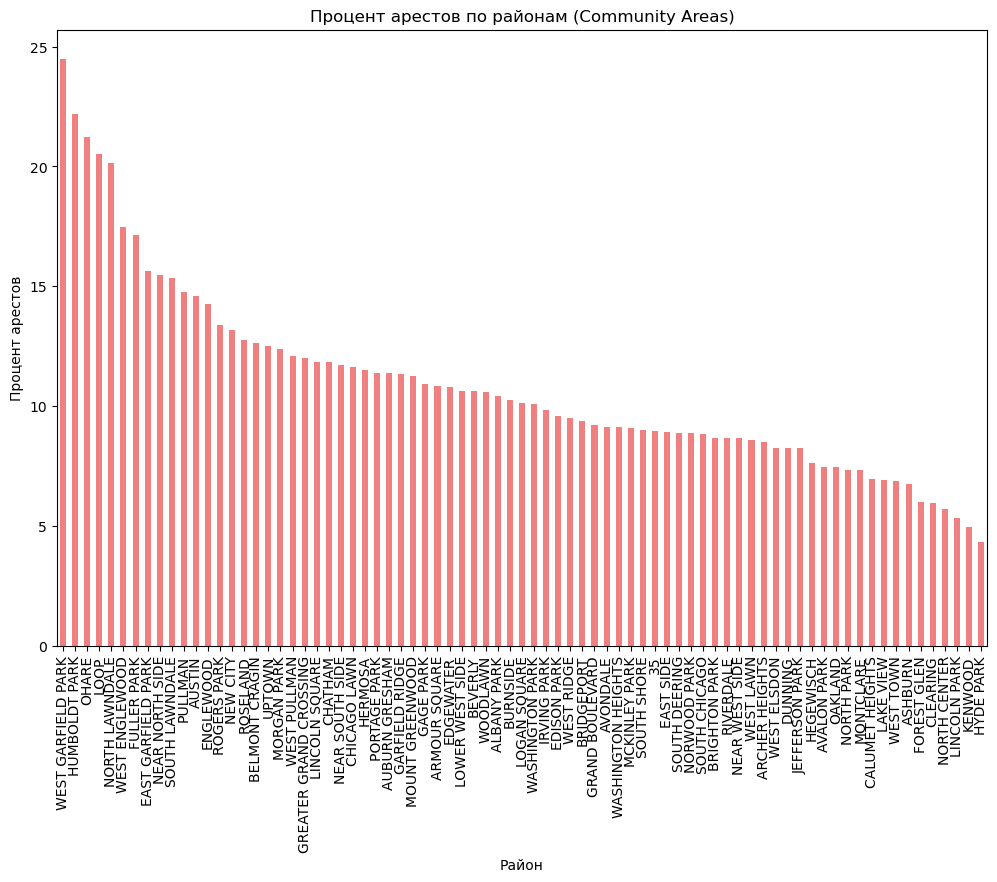

In [46]:
# Средний процент арестов по районам
arrest_percentage_by_area = crime_data.groupby('Community Area')['Arrest'].mean() * 100

# Заменяем номера районов на их названия
arrest_percentage_by_area_named = arrest_percentage_by_area.rename(area_names)

# Визуализация данных
plt.figure(figsize=(12, 8))
arrest_percentage_by_area_named.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Процент арестов по районам (Community Areas)')
plt.xlabel('Район')
plt.ylabel('Процент арестов')
plt.xticks(rotation=90)
plt.show()


### Процент арестов для каждого типа преступления

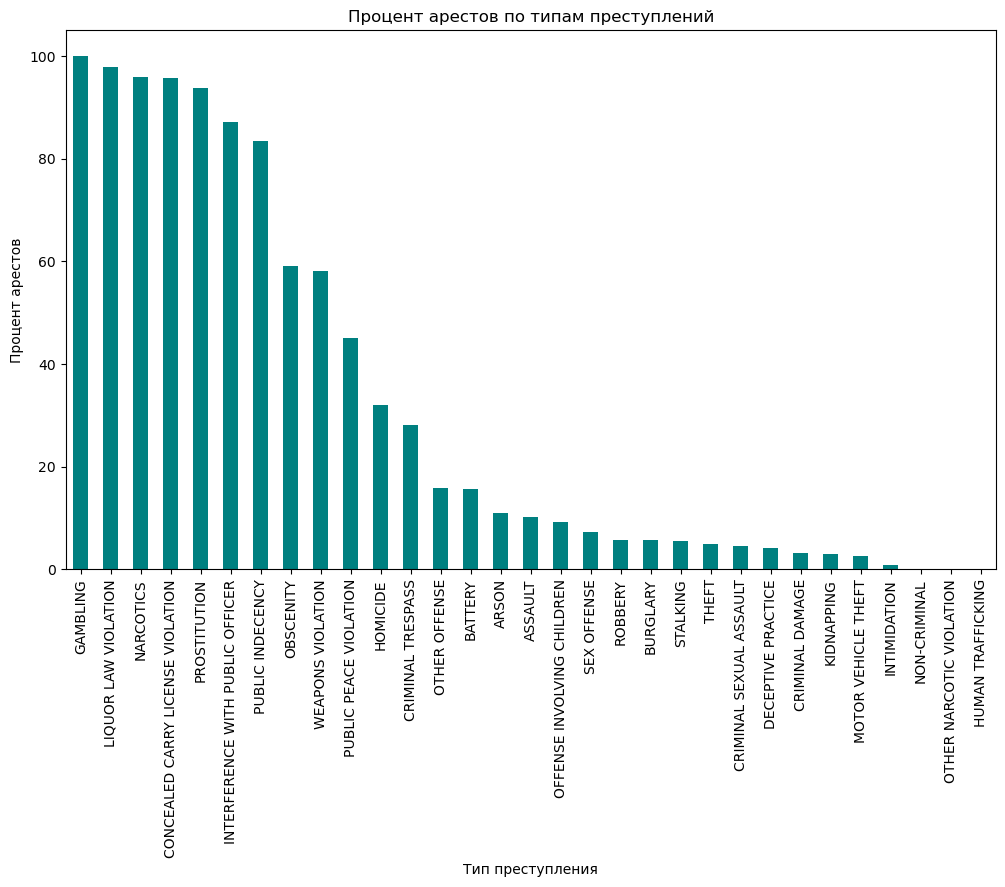

In [19]:
# Процент арестов для каждого типа преступления
arrests_by_type = crime_data.groupby('Primary Type')['Arrest'].mean() * 100

# Визуализация
plt.figure(figsize=(12, 7))
arrests_by_type.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Процент арестов по типам преступлений')
plt.xlabel('Тип преступления')
plt.ylabel('Процент арестов')
plt.xticks(rotation=90)
plt.show()


In [25]:
# Описательная статистика для интересующих переменных
descriptive_stats = crime_data[['Arrest', 'Community Area', 'Beat', 'District', 'Ward']].describe()

# Вывод описательной статистики
print(descriptive_stats)


       Community Area           Beat       District           Ward
count   261890.000000  261890.000000  261890.000000  261890.000000
mean        36.275658    1156.008000      11.330650      23.135637
std         21.580558     712.345978       7.119442      14.011453
min          1.000000     111.000000       1.000000       1.000000
25%         22.000000     533.000000       5.000000      10.000000
50%         32.000000    1032.000000      10.000000      23.000000
75%         53.000000    1732.000000      17.000000      34.000000
max         77.000000    2535.000000      31.000000      50.000000


###  Анализ корреляций между переменными

In [ ]:
1. Анализ корреляций между переменными
Описание: Можно провести корреляционный анализ между различными переменными, такими как районы, время суток, типы преступлений и аресты. Это позволит выявить статистические зависимости между переменными.
Метод: Использование корреляционных матриц и коэффициентов корреляции.

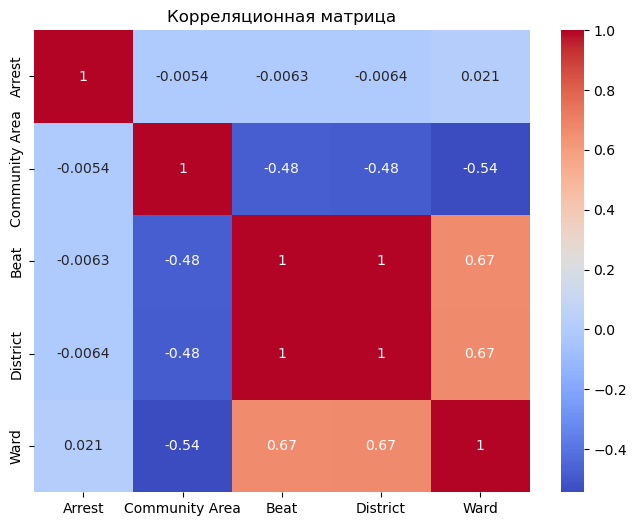

In [21]:
# Корреляционный анализ
correlation_matrix = crime_data[['Arrest', 'Community Area', 'Beat', 'District', 'Ward']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

###  Регрессионный анализ для предсказания вероятности ареста

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Выбираем независимые переменные и целевую переменную
X = crime_data[['Primary Type', 'Hour', 'Community Area Name']]
y = crime_data['Arrest']

# Кодирование категориальных переменных
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Предсказания
y_pred = logreg.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Точность модели (Accuracy): {accuracy:.2f}')
print(f'Точность (Precision): {precision:.2f}')
print(f'Полнота (Recall): {recall:.2f}')
print(f'F1-мера: {f1:.2f}')


Точность модели (Accuracy): 0.91
Точность (Precision): 0.76
Полнота (Recall): 0.35
F1-мера: 0.48


### Оценка статистической значимости результатов

###  P-value и статистическая значимость

In [87]:
import statsmodels.api as sm

# Подготовка данных для логистической регрессии
X = crime_data[['Community Area', 'Beat', 'District', 'Ward']]  # Независимые переменные
y = crime_data['Arrest']  # Зависимая переменная

# Добавляем константу в модель
X = sm.add_constant(X)

# Строим логистическую регрессию с использованием statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Получаем результаты, включая коэффициенты и P-value
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.366652
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Arrest   No. Observations:               261890
Model:                          Logit   Df Residuals:                   261885
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                0.001741
Time:                        14:46:27   Log-Likelihood:                -96022.
converged:                       True   LL-Null:                       -96190.
Covariance Type:            nonrobust   LLR p-value:                 3.007e-71
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1318      0.028    -75.443      0.000      -2.187      -2.076
Community Area   